https://towardsdatascience.com/state-space-model-and-kalman-filter-for-time-series-prediction-basic-structural-dynamic-linear-2421d7b49fa6

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller as adf
import pylab as pl

In [105]:
# Schlumberger Limited historical data onward
df = pd.read_csv("SLB.csv")

In [106]:
len(df)

10099

In [107]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date') #.asfreq('d') # set freq (makes NAN on weekends if used)
# do not ffill, just choose a good frequency

In [108]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [109]:
df.head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-12-31,13.93750,14.00000,13.87500,13.96875,5.425990,449200
1982-01-04,13.75000,13.96875,13.50000,13.68750,5.316739,630400
1982-01-05,13.25000,13.46875,13.00000,13.00000,5.049689,1076800
1982-01-06,12.87500,12.96875,12.75000,12.87500,5.001133,1560400
1982-01-07,12.71875,12.93750,12.50000,12.62500,4.904024,1303600
1982-01-08,12.81250,12.90625,12.68750,12.78125,4.964719,991200
1982-01-11,12.59375,12.93750,12.25000,12.31250,4.782635,1479600
1982-01-12,12.50000,12.68750,12.28125,12.65625,4.916163,1089600
1982-01-13,12.65625,13.06250,12.21875,12.37500,4.806916,1231200


In [110]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Date'>

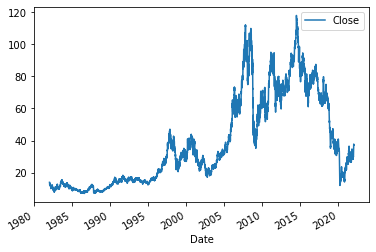

In [111]:
df.plot(y='Close', use_index=True)

## Density & QQ plot


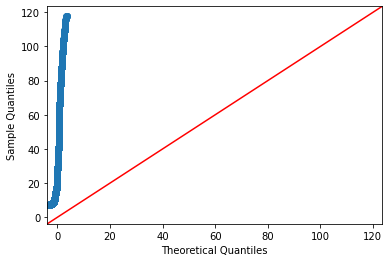

In [112]:
sm.qqplot(df['Close'], line ='45')
py.show()

(array([1571., 1550.,  759.,  589.,  631.,  695.,  487.,  443.,  199.,
          72.,  106.,  188.,  374.,  440.,  341.,  370.,  322.,  263.,
         240.,  153.,  112.,   89.,   64.,   25.,   16.]),
 array([  7.03125   ,  11.46799988,  15.90474976,  20.34149964,
         24.77824952,  29.2149994 ,  33.65174928,  38.08849916,
         42.52524904,  46.96199892,  51.3987488 ,  55.83549868,
         60.27224856,  64.70899844,  69.14574832,  73.5824982 ,
         78.01924808,  82.45599796,  86.89274784,  91.32949772,
         95.7662476 , 100.20299748, 104.63974736, 109.07649724,
        113.51324712, 117.949997  ]),
 <BarContainer object of 25 artists>)

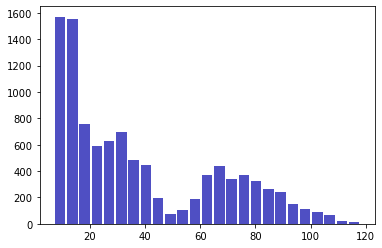

In [113]:
plt.hist(x=df['Close'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [114]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10099.000000,10099.000000,10099.000000,10099.000000,10099.000000,1.009900e+04
mean,38.262287,38.763974,37.733012,38.253325,27.960919,6.306934e+06
std,28.048444,28.370439,27.698094,28.040954,23.479228,4.869409e+06
min,7.000000,7.218750,6.500000,7.031250,3.079414,7.160000e+04
25%,14.500000,14.656250,14.343750,14.500000,7.590967,2.496600e+06
50%,28.812500,29.340000,28.343750,28.734375,19.174709,5.499300e+06
75%,63.995001,64.744999,63.039999,63.950001,48.041290,8.575800e+06
max,118.300003,118.760002,117.349998,117.949997,93.971878,8.713060e+07


## Stationarity Test + Normalize data

In [115]:
adfres = adf(df['Close'])

In [116]:
print('ADF Statistic: %f' % adfres[0])
print('p-value: %f' % adfres[1])

ADF Statistic: -1.875595
p-value: 0.343628


## ACF

## Decompose TS


In [117]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# choosing period
# https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453
# 5 / week, 20/mo, 253 / yr

In [119]:
# model = additive if seasonal variation constant over time else multiplicative
# period is daily prices so = 
result=seasonal_decompose(df['Close'], model='multiplicable', period=5)

5-multiplicable
20-multiplicable
253-multiplicable
5-additive
20-additive
253-additive


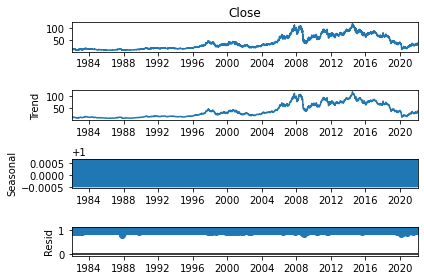

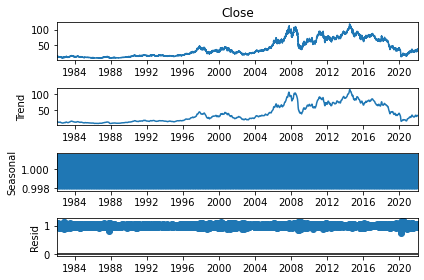

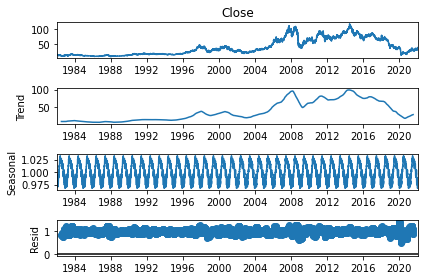

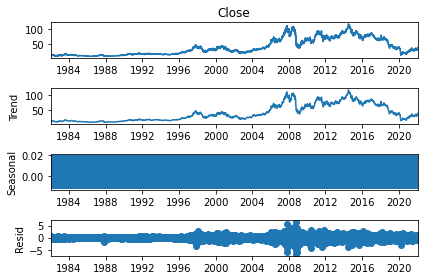

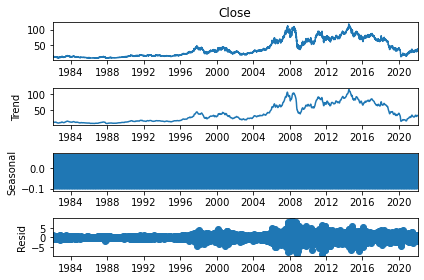

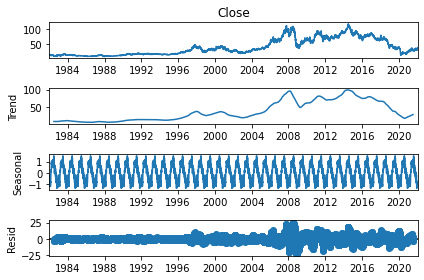

In [124]:
for m in ['multiplicable', 'additive']:
    for p in [5, 20, 253]:
        result=seasonal_decompose(df['Close'], model=m, period=p)
        print("{}-{}".format(p,m))
        result.plot()

In [127]:
result.resid

Date
1981-12-31   NaN
1982-01-04   NaN
1982-01-05   NaN
1982-01-06   NaN
1982-01-07   NaN
              ..
2022-01-12   NaN
2022-01-13   NaN
2022-01-14   NaN
2022-01-18   NaN
2022-01-19   NaN
Name: resid, Length: 10099, dtype: float64